In [13]:
import json
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()
plt.style.use('Solarize_Light2')

In [18]:
orig_ids = pd.read_csv('identifications.csv')
orig_ids

,observation,identifier,username,date,taxon_id,taxon,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden
0,1166,10787,maractwin,2013-08-22T03:13:48+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
1,1166,12809,cedric_lee,2015-04-15T01:02:29+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
2,1623,477,loarie,2012-05-10T23:35:31+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,improving,False,False
3,1623,12809,cedric_lee,2015-04-15T01:03:11+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
4,4992,5692,justin2,2013-06-16T21:35:18+00:00,128712,Coccinella californica,species,10,NaN,True,NaN,improving,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426523,109981431,463097,richyfourtytwo,2022-03-31T05:19:58+00:00,48484,Harmonia axyridis,species,10,48486.0,True,False,improving,False,False
426524,109981431,706076,crawlingworld,2022-03-31T09:48:51+00:00,48484,Harmonia axyridis,species,10,48484.0,True,False,supporting,False,False
426525,109981688,2343836,josefloribundus,2022-03-30T22:12:56-07:00,128712,Coccinella californica,species,10,128712.0,True,False,supporting,False,False
426526,109981689,2343836,josefloribundus,2022-03-30T22:13:04-07:00,128712,Coccinella californica,species,10,128712.0,True,False,supporting,False,False


In [19]:
# looking at just the identifiers who do lady beetles
taxonomy = pd.read_csv('coccinellidae.csv')

cocci_fam_and_below = taxonomy[taxonomy.level <= 30]

# only look at identifiers who're working within Coccinellidae
ids = orig_ids.loc[orig_ids['taxon_id'].isin(cocci_fam_and_below['id'])]
print(len(orig_ids), "identifications on Coccinellidae")
print(len(orig_ids) - len(ids), "extraneous identifications removed")

426528 identifications on Coccinellidae
5469 extraneous identifications removed


In [25]:
ids

,observation,identifier,username,date,taxon_id,taxon,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden
0,1166,10787,maractwin,2013-08-22T03:13:48+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
1,1166,12809,cedric_lee,2015-04-15T01:02:29+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
2,1623,477,loarie,2012-05-10T23:35:31+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,improving,False,False
3,1623,12809,cedric_lee,2015-04-15T01:03:11+00:00,48987,Hippodamia convergens,species,10,NaN,True,NaN,supporting,False,False
4,4992,5692,justin2,2013-06-16T21:35:18+00:00,128712,Coccinella californica,species,10,NaN,True,NaN,improving,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426523,109981431,463097,richyfourtytwo,2022-03-31T05:19:58+00:00,48484,Harmonia axyridis,species,10,48486.0,True,False,improving,False,False
426524,109981431,706076,crawlingworld,2022-03-31T09:48:51+00:00,48484,Harmonia axyridis,species,10,48484.0,True,False,supporting,False,False
426525,109981688,2343836,josefloribundus,2022-03-30T22:12:56-07:00,128712,Coccinella californica,species,10,128712.0,True,False,supporting,False,False
426526,109981689,2343836,josefloribundus,2022-03-30T22:13:04-07:00,128712,Coccinella californica,species,10,128712.0,True,False,supporting,False,False


In [23]:
len(ids['taxon_id'].unique())

678

In [4]:
# observations grouped and sorted by number of times an identifier submitted an ID for just that obs

ids.groupby(['observation', 'identifier'])['date'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,observation,identifier,count
394644,102383348,23520,8
65562,12659383,1012543,5
144201,33353692,736966,5
45515,8372810,640440,5
30170,5730731,402954,5
...,...,...,...
139759,32199599,463097,1
139758,32199579,108264,1
139757,32199334,463097,1
139756,32199311,1442162,1


Here's some of those frequently-revised observations:

- https://www.inaturalist.org/observations/102383348
- https://www.inaturalist.org/observations/12659383
- https://www.inaturalist.org/observations/33353692
- https://www.inaturalist.org/observations/8372810

As you can see, they're often though not always accidental double-clicks, rather than meaningful data.

<class 'pandas.core.series.Series'>


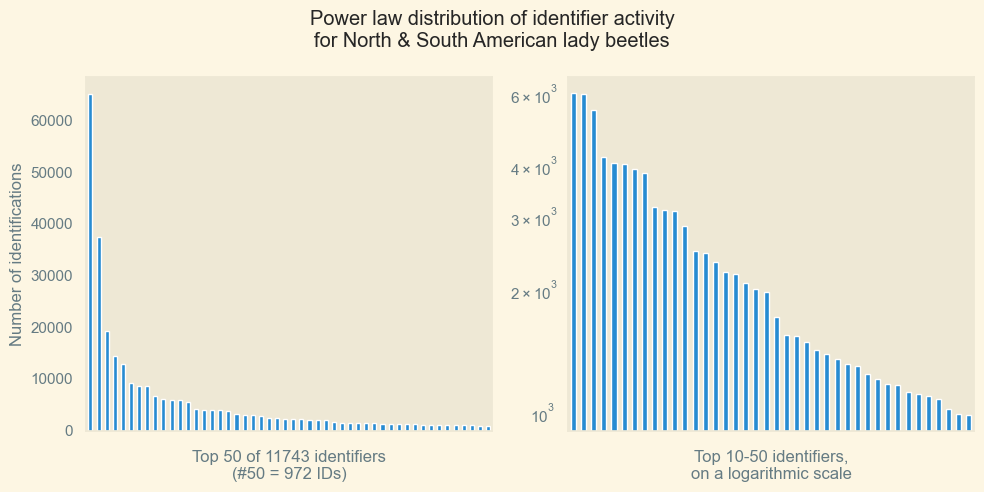

In [12]:
# top identifiers by number of IDs

identifier_stats = pd.read_csv('stats.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle("Power law distribution of identifier activity\nfor North & South American lady beetles")

id_counts = identifier_stats['total']
print(type(id_counts))
tail = 50
ax = id_counts.iloc[:tail].plot.bar(ax=axes[0], legend=False, xlabel=f"Top 50 of {len(id_counts)} identifiers\n(#{tail} = {id_counts.iloc[tail]} IDs)", ylabel='Number of identifications')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.grid(False)

ax2 = id_counts.iloc[10:tail].plot.bar(ax=axes[1], legend=False, xlabel=f"Top 10-50 identifiers,\non a logarithmic scale")
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.grid(False)
ax2.set_yscale('log')
fig.tight_layout()

ax.figure.savefig('top overall')

In [22]:
print(len(identifier_stats))
identifier_stats.iloc[:10]

11743


,identifier,username,total,frac_species,species,frac_genus,genus,frac_tribe,tribe,frac_subfamily,subfamily,frac_family,family
0,463097,richyfourtytwo,65109,0.858990,55928,0.045600,2969,0.087914,5724,0.000415,27,0.007080,461
1,1442162,rob-westerduijn,37487,0.996932,37372,0.001334,50,0.000080,3,0.001147,43,0.000507,19
2,2116455,davidenrique,19244,0.990802,19067,0.005560,107,0.000104,2,0.000156,3,0.003378,65
3,1012326,dusty_in_vilas-tx,14508,0.966157,14017,0.023642,343,0.003377,49,0.004825,70,0.001999,29
4,2249019,elytrid,12954,0.964181,12490,0.006330,82,0.017910,232,0.002393,31,0.009186,119
5,6971,silversea_starsong,9265,0.932650,8641,0.052455,486,0.001295,12,0.011117,103,0.002482,23
6,180811,borisb,8723,0.771065,6726,0.097444,850,0.046085,402,0.024533,214,0.060874,531
7,1485790,cpu,8696,0.796228,6924,0.098436,856,0.040363,351,0.053358,464,0.011615,101
8,297834,kt_woods,6635,0.915147,6072,0.057121,379,0.020347,135,0.001356,9,0.006029,40
9,261069,franciscoacos,6104,0.715433,4367,0.152031,928,0.027195,166,0.047346,289,0.057995,354


In [24]:
identifier_stats.loc[:10, 'total'].sum()

194731

In [5]:
# I want to calculate ID frequencies for each user at each level of the taxonomic hierarchy 
# (...but there's a couple funky levels I know I'll want to ignore, so let's check the relevant names first)

print(ids['rank'].unique())

['species' 'family' 'genus' 'subfamily' 'subspecies' 'tribe' 'form'
 'complex']


In [6]:
ids[ids['rank'] == 'complex'].groupby('taxon').count()
# yup, there's literally just the one complex (and I happen to know it was only added in the past month or so)

,observation,identifier,username,date,taxon_id,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden
taxon,,,,,,,,,,,,,
Hyperaspis signata-binotata agg,17,17,17,17,17,17,17,17,17,17,17,17,17


In [7]:
ids[ids['rank'] == 'form'].groupby('taxon').count()
# there's also only one form
# and iNat is weird about handling subspecies IDs, so we're just going to roll all those into species

# (technically complex is a level above species, but it generally gets added to the taxonomy to function as a
# "these species are generally indistinguishable in the field, so this is as close to species as it gets" category)

,observation,identifier,username,date,taxon_id,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden
taxon,,,,,,,,,,,,,
Coccinella californica johnsoni,21,21,21,21,21,21,21,21,21,21,21,21,21


In [9]:
for thresh in reversed(range(0, 60000, 100)):
    num_IDers = len(identifier_stats[identifier_stats['total'] > thresh])
    if num_IDers > 5 and thresh > 0:
        print(f"{num_IDers} identifiers >", thresh)

# 327 out of 11,743 identifiers have done more than 100 IDs each
# only 48 identifiers have done more than 1,000 IDs each

6 identifiers > 9200
6 identifiers > 9100
6 identifiers > 9000
6 identifiers > 8900
6 identifiers > 8800
7 identifiers > 8700
8 identifiers > 8600
8 identifiers > 8500
8 identifiers > 8400
8 identifiers > 8300
8 identifiers > 8200
8 identifiers > 8100
8 identifiers > 8000
8 identifiers > 7900
8 identifiers > 7800
8 identifiers > 7700
8 identifiers > 7600
8 identifiers > 7500
8 identifiers > 7400
8 identifiers > 7300
8 identifiers > 7200
8 identifiers > 7100
8 identifiers > 7000
8 identifiers > 6900
8 identifiers > 6800
8 identifiers > 6700
9 identifiers > 6600
9 identifiers > 6500
9 identifiers > 6400
9 identifiers > 6300
9 identifiers > 6200
10 identifiers > 6100
11 identifiers > 6000
12 identifiers > 5900
12 identifiers > 5800
12 identifiers > 5700
12 identifiers > 5600
12 identifiers > 5500
13 identifiers > 5400
13 identifiers > 5300
13 identifiers > 5200
13 identifiers > 5100
13 identifiers > 5000
13 identifiers > 4900
13 identifiers > 4800
13 identifiers > 4700
13 identifiers > 46

<AxesSubplot: title={'center': 'Identifiers with > 1,000 IDs'}>

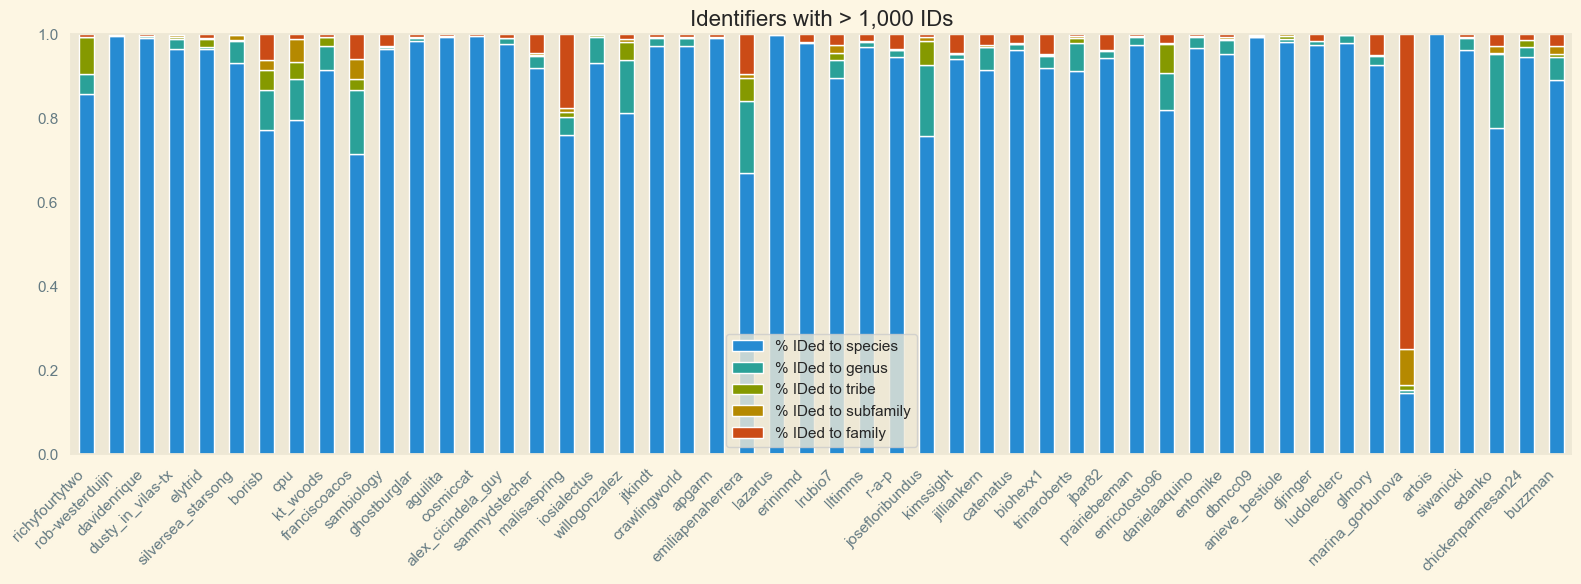

In [10]:
# what taxon level do people usually ID at?

props = ['frac_species', 'frac_genus', 'frac_tribe', 'frac_subfamily', 'frac_family']
ax = identifier_stats.loc[:49, props].plot.bar(stacked=True, figsize=(16,6), title='Identifiers with > 1,000 IDs')
ax.set(xticklabels=identifier_stats.loc[:49, 'username'], ylim=(0,1))
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.legend(labels=['% IDed to species', '% IDed to genus', '% IDed to tribe', '% IDed to subfamily', '% IDed to family'])
ax.grid(False)
ax.figure.tight_layout()

ax.figure.savefig('1k.png')
ax

<AxesSubplot: title={'center': 'Identifiers with 100+ IDs and < 75% species-level IDs'}>

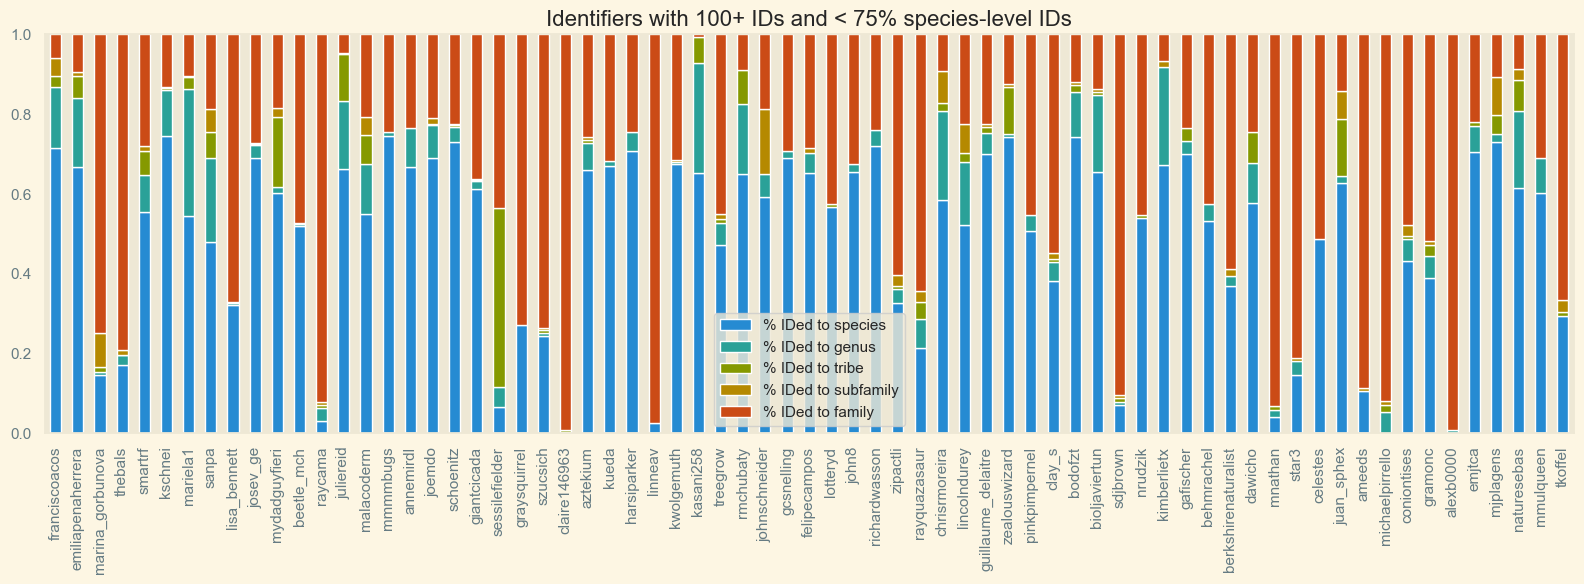

In [11]:
# identifiers who focus on non-species IDs
generalists = identifier_stats[(identifier_stats['total'] > 100) & (identifier_stats['frac_species'] < .75)]
ax = generalists.loc[:, props].plot.bar(stacked=True, figsize=(16,6), title="Identifiers with 100+ IDs and < 75% species-level IDs")
ax.set(xticklabels=generalists.loc[:, 'username'], ylim=(0,1))
ax.legend(labels=['% IDed to species', '% IDed to genus', '% IDed to tribe', '% IDed to subfamily', '% IDed to family'])
ax.grid(False)
ax.figure.tight_layout()

ax.figure.savefig('gen.png')
ax